In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from glove import Glove
from glove import Corpus

import numpy as np

In [2]:
import re 
       
def print_dict(dct):
    for item, amount in dct.item():
        print("{} ({})".format(item, amount))

def read_vocab_cut(filename):
    
    list_ = []
    with open(filename, 'r', encoding='utf-8-sig') as datafile:
        for line in datafile:
            list_.append(line.strip()) 
    return list_

def read_vocab(filename):
    
    dict_ = {}
    with open(filename, 'r', encoding='utf-8-sig') as datafile:
        for line in datafile:
            occurence = line.strip().split(' ')[0]
            word = line.strip().split(' ')[1]
            dict_[word] = int(occurence)
    return dict_

In [4]:
import os
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/data/twitter_datasets_epfl/unique/full/')
os.system('build_vocab.sh')
os.system('cut_vocab.sh')

-1073741819

In [3]:
import os
os.chdir(r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project2\data\twitter_datasets_stanford')

glove_stanford = Glove.load_stanford('glove.twitter.27B.25d.txt')

In [19]:
glove_stanford.most_similar("'t", number=5)

Exception: Word not in dictionary

In [17]:
import os
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/data/twitter_datasets_epfl/unique/full/')

# read epfl data sets
vocab_all = read_vocab('vocab_all_full.txt')
vocab_all_cut = read_vocab_cut('vocab_all_full_cut.txt')

lacking_words = {}
for word in vocab_all_cut:
        word_filtered = list(filter(None,  re.split("[#]+", word.strip())))
        if word_filtered: 
            word_filtered = word_filtered[0]
            if "'" in word_filtered and not word_filtered[0].isdigit() and not word_filtered in glove_stanford.dictionary:
                if not word_filtered in lacking_words:
                    lacking_words[word_filtered] = vocab_all[word]

In [18]:
print("\n".join("{}\t{}".format(k, v) for k, v in lacking_words.items()))

i'm	162732
don't	79753
it's	65059
can't	54537
i'll	37750
that's	34991
you're	31523
i've	22610
didn't	21340
won't	13997
he's	13031
haven't	11477
she's	10935
doesn't	9598
what's	9181
i'd	9075
you'll	8620
there's	8209
we're	7777
isn't	7513
let's	6890
they're	6780
wasn't	6136
couldn't	5415
ain't	5116
we'll	4879
wouldn't	4425
you've	4402
y'all	4056
:')	3908
who's	3724
women's	3652
aren't	3476
men's	3053
it'll	2787
here's	2260
you'd	2089
how's	2014
where's	1876
shouldn't	1788
we've	1634
webster's	1624
hasn't	1509
today's	1503
he'll	1339
weren't	1222
they'll	1189
she'll	981
everyone's	966
world's	929
should've	823
would've	792
it'd	742
they've	653
someone's	641
america's	606
we'd	568
could've	558
that'll	550
u're	543
children's	513
ya'll	508
mother's	498
god's	492
mcdonald's	479
i'ma	469
liam's	454
mom's	452
life's	436
collector's	429
he'd	421
everything's	421
tonight's	417
u'll	411
tomorrow's	388
people's	385
one's	380
dad's	372
they'd	369
that'd	356
:'d	356
hadn't	349
girl's	348
man's	338
n

In [11]:
print('number of words in the epfl datasets BUT not present in stanford dictionary:', len(lacking_words))
print('number of words in the epfl datasets:', len(vocab_all_cut))
print('ratio in the epfl dataset:', len(lacking_words)/len(vocab_all_cut)*100)

number of words in the epfl datasets BUT not present in stanford dictionary: 10680
number of words in the epfl datasets: 94433
ratio in the epfl dataset: 11.309605752226446


In [29]:
import operator

freq_min = 50
freq_max = np.inf

lacking_words_sorted = sorted(lacking_words.copy().items(), key=operator.itemgetter(1), reverse = True)

lacking_words_sorted_occ = []
for k,v in lacking_words_sorted:
    if v<freq_max and v>freq_min:
        lacking_words_sorted_occ.append(v)

In [30]:
print('number of words in the epfl datasets BUT not present in stanford dictionary:', len(lacking_words))
print('number of words in the epfl datasets whose occurences is higher than ,', freq_min, ':', len(vocab_all_cut))
print('ratio in the epfl dataset:', len(lacking_words_sorted_occ)/len(vocab_all_cut)*100)

number of words in the epfl datasets BUT not present in stanford dictionary: 10680
number of words in the epfl datasets whose occurences is higher than , 50 : 94433
ratio in the epfl dataset: 0.6417248207723995


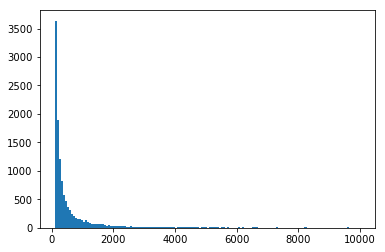

In [34]:
freq_min = 100
freq_max = 1e4

vocab_sorted = sorted(vocab_all.copy().items(), key=operator.itemgetter(1), reverse = True)

vocab_sorted_occ = []
for k,v in vocab_sorted:
    if v<freq_max and v>freq_min:
        vocab_sorted_occ.append(v)
        
plt.figure()
plt.hist(vocab_sorted_occ, bins=150)
plt.show()

In [41]:
print(vocab_sorted[:10])

[('\ufeff<user>', 1514471), ('!', 945602), ('i', 940037), ('.', 687291), ('the', 684570), (',', 663599), ('to', 649231), ('you', 538244), ('(', 496427), ('a', 472789)]
